In [13]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1]:
# Data from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

In [14]:
# Obtained the column names from file - breast-cancer-wisconsin_names
data = pd.read_csv("breast-cancer-wisconsin_data.csv",names = ["Sample code number","Clump Thickness","Uniformity of Cell Size",
                                                              "Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size",
                                                              "Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Class"])

In [15]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Data Exploration

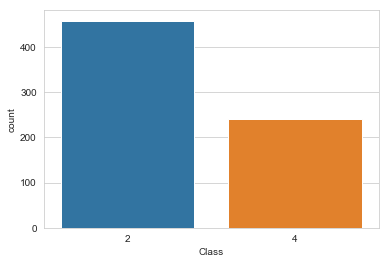

In [16]:
# 2 for benign, 4 for malignant
sns.countplot(x='Class',data = data)

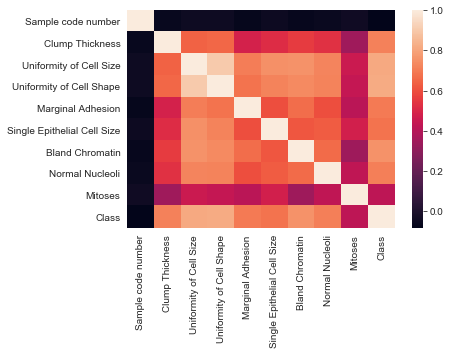

In [17]:
#visualization of relationships between features and diagnoses
sns.heatmap(data.corr())
plt.show()

# Data Preparation

In [18]:
data.shape

(699, 11)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [20]:
# One column is not int
data[(data['Bare Nuclei'] == '?')]

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [21]:
# Number of rows having '?'
len(data[(data['Bare Nuclei'] == '?')])

16

In [22]:
len(data)

699

In [23]:
# 2% of the data has missing values
(len(data[(data['Bare Nuclei'] == '?')])/len(data))*100

2.28898426323319

In [24]:
# Dropped rows that has missing values
data = data.replace({'?': np.nan}).dropna()

In [25]:
data['Bare Nuclei'].isna().sum()

0

In [26]:
data["Bare Nuclei"]=data["Bare Nuclei"].astype(int)

In [27]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Selecting features and target

In [ ]:
# Select all columns except the last column
X = data.iloc[:,:-1]

In [ ]:
# Select the last column which is the target
Y = data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the data into train and test
x_Train, x_Test, y_Train, y_Test = train_test_split(X,Y, test_size = 0.40, random_state = 0)

# GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
gb = GradientBoostingClassifier()

In [ ]:
# parametes of GradientBoostingClassifier
GradientBoostingClassifier()

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
# Setting the parameters of GradientBoostingClassifier model
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth' : [1, 3,5,7,9],
    'n_estimators' : [5,50,250,500],
    'learning_rate' : [0.01,0.1,1,10,100]
}

In [ ]:
gridCV = GridSearchCV(estimator = gb, param_grid = parameters, cv=5 )
gridFit = gridCV.fit(x_Train, y_Train)

/Users/apoorva/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
gridFit

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 3, 5, 7, 9], 'n_estimators': [5, 50, 250, 500], 'learning_rate': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
gridFit.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
# Prediction on test data
pred = gridFit.predict(x_Test)

In [ ]:
pred

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2,
       2, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 2,
       4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2,
       2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 2, 4])

In [ ]:
# Finding the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_Test, pred)

0.9562043795620438

In [ ]:
# Creating a dummy data for new patient
newPatient = np.array([1000023,1,8,1,5,1,10,10,7,1])
newPatient = newPatient.reshape(1,-1)

In [ ]:
# Prediction for the new data. The new patient is likely to have malignant cancer.
gridFit.predict(newPatient)

array([4])

# XGBoostClassifier

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier()

In [ ]:
XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [ ]:
# x_Train and y_Train has been created in the above steps in Gradient Boosting Classifier
model.fit(x_Train, y_Train)

In [ ]:
# Prediction on test data
predict = model.predict(x_Test)

In [ ]:
predict

In [ ]:
accuracy_score(y_Test, predict)